In [494]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [495]:
df=pd.read_csv("../Dataset/bike-sharing-daily.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


In [496]:
df["dteday"]=pd.to_datetime(df["dteday"])

In [497]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


In [498]:
df.drop(columns="instant",inplace=True)

In [499]:
df.head(3)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349


<Axes: >

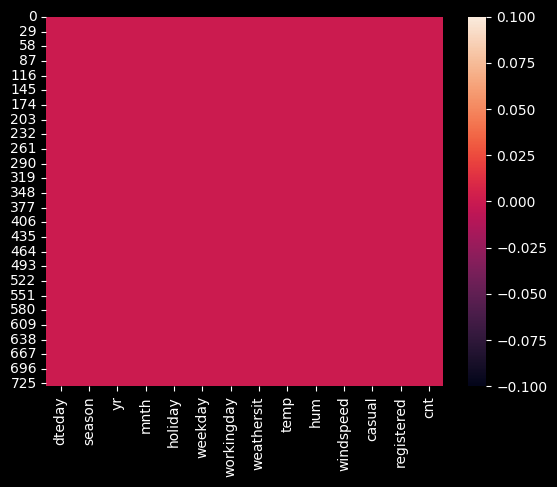

In [500]:
sns.heatmap(df.isnull())

In [501]:
df.drop(columns=["casual","registered"],inplace=True)

In [502]:
df.index=pd.DatetimeIndex(df.dteday)

<Axes: xlabel='dteday'>

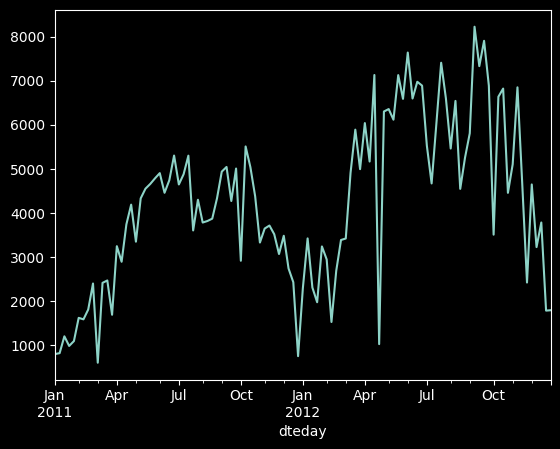

In [503]:
df["cnt"].asfreq("W").plot()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5532\2798217392.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["cnt"].asfreq("M").plot()


<Axes: xlabel='dteday'>

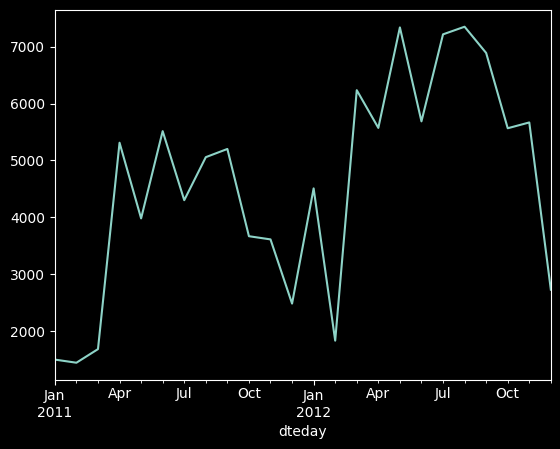

In [504]:
df["cnt"].asfreq("M").plot()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5532\2262775294.py:1: FutureWarning: 'q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df["cnt"].asfreq("q").plot()


<Axes: xlabel='dteday'>

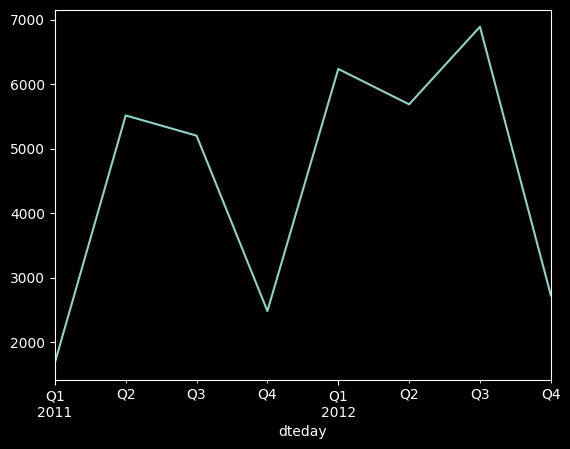

In [505]:
df["cnt"].asfreq("q").plot()

In [506]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,,
2011-01-01,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


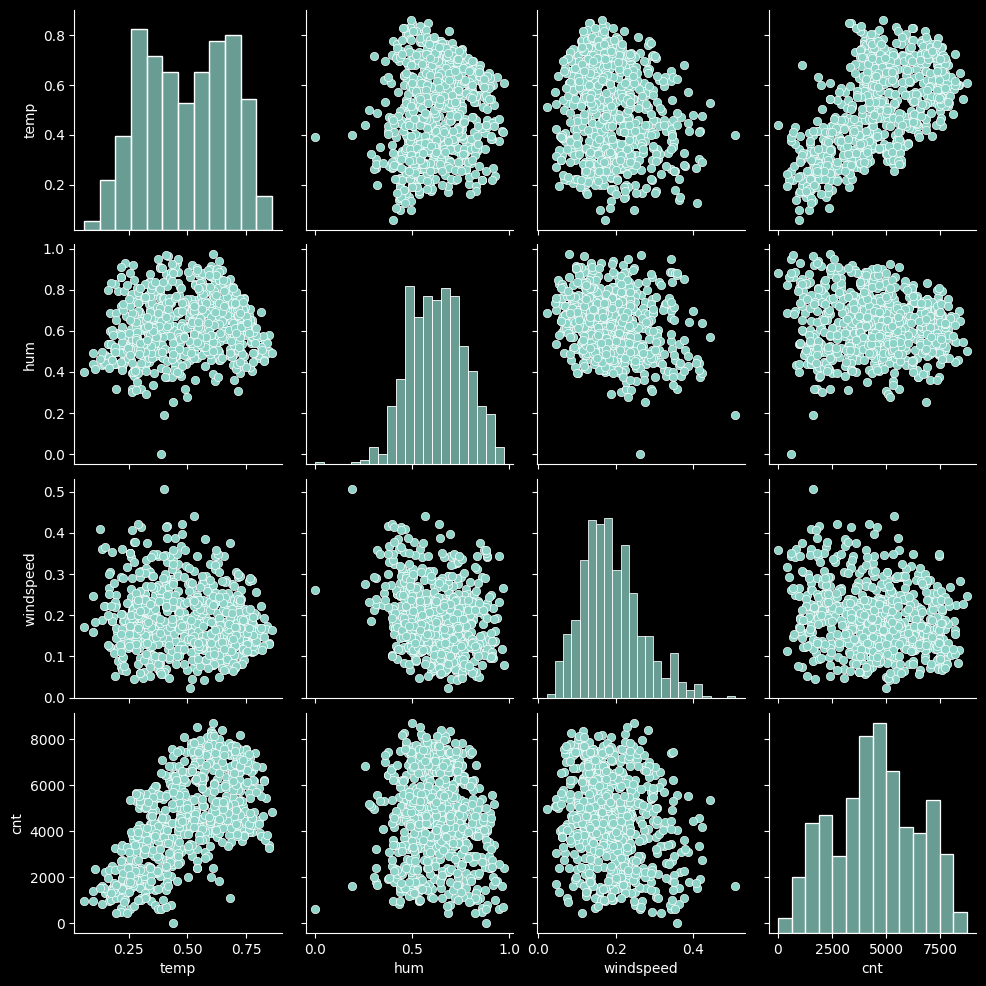

In [507]:
sns.pairplot(data=df[["temp","hum","windspeed","cnt"]])

In [508]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,,
2011-01-01,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [509]:
df["season"].value_counts()

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

In [510]:
df["weathersit"].value_counts()

weathersit
1    463
2    247
3     21
Name: count, dtype: int64

In [511]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()

In [512]:
catagorical=["season","yr","mnth","holiday","weekday","workingday","weathersit"]
numaric=df.drop(columns=["season","yr","mnth","holiday","weekday","workingday","weathersit"])

In [513]:
encoded_data=encoder.fit_transform(df[catagorical]).toarray()

In [514]:
encoder.get_feature_names_out()

array(['season_1', 'season_2', 'season_3', 'season_4', 'yr_0', 'yr_1',
       'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'holiday_0', 'holiday_1', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'workingday_0',
       'workingday_1', 'weathersit_1', 'weathersit_2', 'weathersit_3'],
      dtype=object)

In [515]:
encoded_df = pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out(),index=df.index)
encoded_df.head()

,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_0,holiday_1,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
dteday,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-01,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2011-01-02,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2011-01-03,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2011-01-04,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2011-01-05,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [516]:
encoded_df.shape

(731, 32)

In [517]:
numaric.head()

,dteday,temp,hum,windspeed,cnt
dteday,,,,,
2011-01-01,2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,2011-01-02,0.363478,0.696087,0.248539,801
2011-01-03,2011-01-03,0.196364,0.437273,0.248309,1349
2011-01-04,2011-01-04,0.200000,0.590435,0.160296,1562
2011-01-05,2011-01-05,0.226957,0.436957,0.186900,1600


In [518]:
numaric.shape

(731, 5)

In [519]:
new_df=pd.concat([encoded_df,numaric],axis=1)

In [520]:
new_df.head()

,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_0,holiday_1,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,dteday,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-01,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2011-01-02,0.363478,0.696087,0.248539,801
2011-01-03,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2011-01-03,0.196364,0.437273,0.248309,1349
2011-01-04,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2011-01-04,0.200000,0.590435,0.160296,1562
2011-01-05,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2011-01-05,0.226957,0.436957,0.186900,1600


In [521]:
new_df.shape

(731, 37)

In [522]:
new_df["year"] = new_df["dteday"].dt.year
new_df["month"] = new_df["dteday"].dt.month
new_df["day"] = new_df["dteday"].dt.day
new_df["dayofweek"] = new_df["dteday"].dt.dayofweek
new_df = new_df.drop(columns=["dteday"]).reset_index()



In [523]:
new_df.drop(columns=["dteday"],inplace=True)

In [524]:
x=new_df.drop(columns=["cnt"])
y=new_df["cnt"]

In [525]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25)

In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100,activation="relu",input_shape=[x_train.shape[1]]))
model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(40,activation="relu"))
model.add(tf.keras.layers.Dense(1,activation="linear"))

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [527]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 100)            │         4,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 120)            │        12,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 100)            │        12,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 40)             │         4,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,301 (126.18 KB)

 Trainable params: 32,301 (126.18 KB)

 Non-trainable params: 0 (0.00 B)

In [528]:
model.compile(loss="mse",optimizer="Adam")

In [529]:
x_train.shape

(548, 39)

In [530]:
history=model.fit(x_train,y_train,epochs=700,batch_size=50)

Epoch 1/700


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 22343934.0000
Epoch 2/700
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16185748.0000 
Epoch 3/700
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7102962.0000 
Epoch 4/700
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4381765.5000 
Epoch 5/700
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3840642.0000 
Epoch 6/700
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3595369.0000 
Epoch 7/700
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3515637.0000 
Epoch 8/700
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3517551.7500 
Epoch 9/700
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3575442.5000 
Epoch 10/700
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3646131.5000 
Epoch 11/700
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3406269.0000 
Epoch 12/700
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3774031.7500 
Epoch 13/700
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3729289.0000 
Epoch 14/700
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss

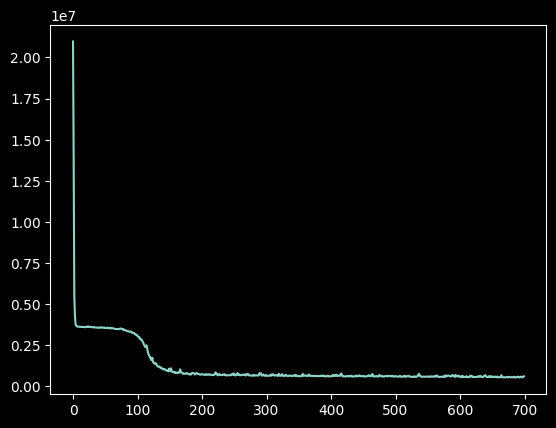

In [532]:
plt.plot(history.history["loss"])